# Decision Trees
## Definition

Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. Each node in the tree specifies a test of some attribute of the instance, and each branch descending from that node corresponds to one of the possible values for this attribute. An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, then moving down the tree branch corresponding to the value of the attribute in the given example. This process is then repeated for the subtree rooted at the new node.

Tree node represents some attribute. Values of the attributes are branches of the tree. So, mathematically decision tree represents a disjunction of conjunctions of constraints on the attribute values of instances.

Decision tree learning is generally best suited to problems with the following characteristics:
* Instances are represented by attribute-valuepairs.
* The target function has discrete output values.
* Disjunctive descriptions may be required.
* The training data may contain errors.
* The training data may contain missing attribute values.

## Algorithms

### ID3
ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

### C4.5
C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

### C5.0
C5.0 is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

### CART
CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.

## information Gain

Information gain is the measure of attribute importance to select this as the current top node of the tree. It's basically entropy of positive and negative examples of the attribute values in the collection $S$.

$$H(S) = -p_{\oplus} log_2 p_{\oplus} - p_{\ominus} log_2 p_{\ominus}$$

The formula is suitable for binary classification task. For multicategory classification task on set of categories $C$ the formula should be modified as follows:

$$H(S) = -\sum_{c \in C} p_c log_2 p_c$$

Here $p_c$ is the probability of category $c$ for the collection of examples $S$. The value of $p_c$ is expressed as fraction of number of examples signed by category $c$ of number of all examples in the collection.

This is the measure of all train collection's entropy - the base value to calculate **information gain**:

$$G(S,A) = H(S) - \sum_{v \in A} {\frac{|S_v|}{|S|} H(S_v)}$$

Information gain is used in algorithm ID3 (and its enhancement C4.5) to select the best attribute to build the current node.

### Build ID3 Tree

1. compute the entropy for data-set
2. for every attribute/feature:
       1. calculate entropy for all categorical values
       2. take average information entropy for the current attribute
       3. calculate gain for the current attribute
3. pick the highest gain attribute.
4. Repeat until we get the tree we desired.

## Gini Impurity

Gini impurity is used in algorithm Classification and Regression Trees (CART) to select the best attribute to build the current node.

$$G(S,A) = 1 - \sum_{c \in C} p_c^2$$

### Build CART Tree

1. compute the gini impurity for data-set
2. for every attribute/feature:
       1. calculate gini impurity gain for all categorical values
       2. take average gini impurity for the current attribute 
       3. calculate the gini gain
3. pick the best gini gain attribute.
4. Repeat until we get the tree we desired.



# Ensembple Methods
## Definition

Ensemble methods, which combines several decision trees to produce better predictive performance than utilizing a single decision tree. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner.

Let’s talk about few techniques to perform ensemble decision trees:
1. Bagging
2. Boosting

## Bagging

**Bagging** (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

**Random Forest** is an extension over bagging. It takes one extra step where in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. When you have many random trees. It’s called Random Forest.

### Advantages of using Random Forest technique:

* Handles higher dimensionality data very well.
* Handles missing values and maintains accuracy for missing data.

### Disadvantages of using Random Forest technique:

Since final prediction is based on the mean predictions from subset trees, it won’t give precise values for the regression model.

## Boosting

Boosting is another ensemble technique to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree.

**Gradient Boosting** is an extension over boosting method.

Gradient Boosting = Gradient Descent + Boosting.

It uses gradient descent algorithm which can optimize any differentiable loss function. An ensemble of trees are built one by one and individual trees are summed sequentially. Next tree tries to recover the loss (difference between actual and predicted values).

### Advantages of using Gradient Boosting technique:

* Supports different loss function.
* Works well with interactions.

### Disadvantages of using Gradient Boosting technique:

* Prone to over-fitting.
* Requires careful tuning of different hyper-parameters


In [7]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
print('classes: ', iris.target_names)
print('featurers: ', iris.feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('train: ', X_train.shape)
print('test: ', X_test.shape)

estimator = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
estimator.fit(X_train, y_train)

classes:  ['setosa' 'versicolor' 'virginica']
featurers:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
train:  (112, 4)
test:  (38, 4)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

# Parameters of DecisionTreeClassifier

## criterion

string, optional (default=”gini”)

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

## splitter

string, optional (default=”best”)

The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

## max_depth

int or None, optional (default=None)

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

## min_samples_split

int, float, optional (default=2)

The minimum number of samples required to split an internal node:

* If int, then consider min_samples_split as the minimum number.
* If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

## min_samples_leaf

int, float, optional (default=1)

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

* If int, then consider min_samples_leaf as the minimum number.
* If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

## min_weight_fraction_leaf

float, optional (default=0.)

The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

## max_features

int, float, string or None, optional (default=None)

The number of features to consider when looking for the best split:
* If int, then consider max_features features at each split.
* If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
* If “auto”, then max_features=sqrt(n_features).
* If “sqrt”, then max_features=sqrt(n_features).
* If “log2”, then max_features=log2(n_features).
* If None, then max_features=n_features.

Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

## max_leaf_nodes

int or None, optional (default=None)

Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

## min_impurity_decrease

float, optional (default=0.)

A node will be split if this split induces a decrease of the impurity greater than or equal to this value. The weighted impurity decrease equation is the following:

## presort

bool, optional (default=False)

Whether to presort the data to speed up the finding of best splits in fitting. For the default settings of a decision tree on large datasets, setting this to true may slow down the training process. When using either a smaller dataset or a restricted depth, this may speed up the training.


# Decision Estimator Internal Tree Structure

The decision estimator has an attribute called tree_, which stores the entire tree structure and allows access to low level attributes. The binary tree tree_ is represented as a number of parallel arrays. The i-th element of each  array holds information about the node `i`. Node 0 is the tree's root.

**NOTE**:
Some of the arrays only apply to either leaves or split nodes, resp. In this case the values of nodes of the other type are arbitrary!

Among those arrays, we have:
   - left_child, id of the left child of the node
   - right_child, id of the right child of the node
   - feature, feature used for splitting the node
   - threshold, threshold value at the node


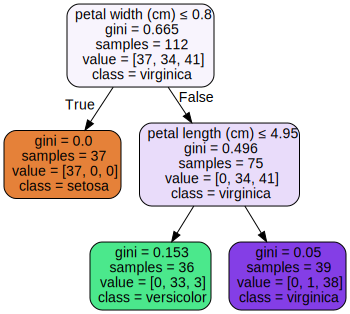

In [13]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(estimator, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [14]:
# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 5 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 leaf node.
		node=4 leaf node.

Rules used to predict sample 0: 
decision id node 0 : (X_test[0, 3] (= 2.4) > 0.800000011920929)
decision id node 2 : (X_test[0, 2] (= 5.1) > 4.950000047683716)

The following samples [0, 1] share the node [0 2] in the tree
It is 40.0 % of all nodes.
